Seaborn is designed for Statistical Visualization. It can automatically calculate and plot things (like regression lines or confidence intervals) that would take 20 lines of code in Matplotlib.

**Seaborn Syntax** : It was designed to work perfectly with Pandas DataFrames.

**Matplotlib**: plt.plot(df['x'], df['y']) (Manual lists)

**Seaborn**: sns.scatterplot(data=df, x='col_name', y='col_name') (Clean & readable)

The Power of hue: This is Seaborn's superpower. If you want to color your points based on a category (e.g., "Male" vs "Female"), in Matplotlib you have to write a loop. In Seaborn, you just add hue='sex', and it handles the colors and legend automatically.

The Boxplot (New Chart!): This is a crucial statistical chart. It summarizes the distribution of data using 5 numbers:

**Median**: The middle line.

**The Box**: Represents the middle 50% of data (Interquartile Range).

**Whiskers**: The range of the rest of the data.

**Outliers**: Points (dots) that are unusually high or low.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Setup & Import

In [2]:
# Load the famous 'tips' dataset (restaurant bills)
# Seaborn has practice datasets built-in!

df = sns.load_dataset('tips')
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# Scatterplot with hue

Let's visualize the relationship between the total_bill and the tip.

We will use hue to see if Smokers tip differently than Non-Smokers.

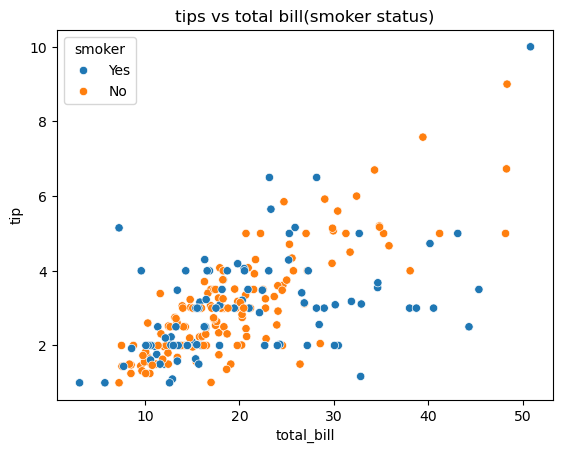

In [7]:
# sns.scatterplot
# data = name of ur dataframe
# x/y = names of your column
# hue = column to color-code by 

sns.scatterplot(data = df ,x = 'total_bill' , y =  'tip', hue = 'smoker')

plt.title("tips vs total bill(smoker status)")
plt.show()

# Task 3: The "Magic" Plot (lmplot)

Seaborn can draw a Regression Line (trend line) automatically using lmplot (Linear Model plot).

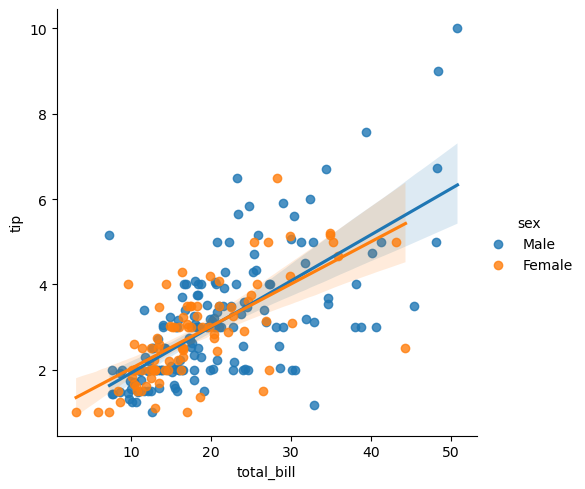

In [9]:
# This draws the scatterplot AND the best-fit trend line

sns.lmplot(data = df, x = 'total_bill', y = 'tip' , hue = 'sex')
plt.show()

# The Boxplot

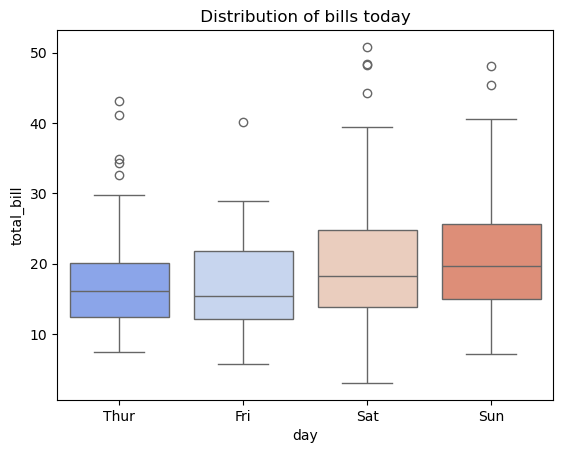

In [11]:
# X-axis = Category (Day)
# Y-axis = Numerical (Total Bill)

sns.boxplot (data = df , x ='day' , y = 'total_bill' , hue = 'day',palette = 'coolwarm')

plt.title(" Distribution of bills today ")
plt.show()

#  Seaborn Histogram (`sns.histplot`) — Complete Reference

A **histogram** visualizes the distribution of a numerical variable.  
Seaborn’s `sns.histplot()` is a flexible tool that supports **KDE**, **group comparisons**, **normalization**, and **styling**.

---

##  1. Basic Syntax

```python
sns.histplot(
    data=None, 
    x=None, y=None, 
    bins=None, binwidth=None,
    stat='count', 
    hue=None, 
    kde=False, 
    element='bars', 
    multiple='layer', 
    palette=None
)


| Parameter  | Purpose                                                     |
| ---------- | ----------------------------------------------------------- |
| `data`     | DataFrame or array-like                                     |
| `x`, `y`   | variable(s) to plot                                         |
| `bins`     | number of bins                                              |
| `binwidth` | width of bins                                               |
| `stat`     | normalization (`count`, `density`, `percent`, etc.)         |
| `hue`      | split data by category                                      |
| `kde`      | add Kernel Density Estimate (smooth curve)                  |
| `element`  | bar style: `bars`, `step`, `poly`                           |
| `multiple` | how groups are displayed: `layer`, `stack`, `dodge`, `fill` |
| `palette`  | color scheme for groups                                     |
| `fill`     | fill bars True/False                                        |


**2. Basic Histogram**
sns.histplot(data=titanic, x='age')


Shows distribution of age

Ignores NaN values by default

Automatically chooses number of bins

**3. Customizing Bins**

sns.histplot(data=titanic, x='age', bins=30)          # number of bins

sns.histplot(data=titanic, x='age', binwidth=5)      # width of bins

sns.histplot(data=titanic, x='age', bins=[0,10,20,30,40,50,60,70,80])  # custom edges

**4. Histogram with KDE (Smoothed Curve)**

sns.histplot(data=titanic, x='age', kde=True)


KDE = Kernel Density Estimate

Shows smooth distribution trend

**5. Comparing Groups Using hue**

sns.histplot(data=titanic, x='age', hue='survived', kde=True)


Splits histogram by category

Automatically applies different colors

Useful for comparing distributions

**6. Histogram Styles: element and multiple**
Element (bar style)
| Value            | Description                           |
| ---------------- | ------------------------------------- |
| `bars` (default) | Filled bars                           |
| `step`           | Outlined bars only                    |
| `poly`           | Connects bin tops with a polygon line |

sns.histplot(data=titanic, x='age', hue='survived', element='bars')  # filled bars

sns.histplot(data=titanic, x='age', hue='survived', element='step')  # outline

sns.histplot(data=titanic, x='age', hue='survived', element='poly')  # polygon

Multiple (group arrangement)

| Value             | Description                 |
| ----------------- | --------------------------- |
| `layer` (default) | Overlapping bars            |
| `stack`           | Stacked bars                |
| `dodge`           | Side-by-side bars           |
| `fill`            | Stacked, normalized to 100% |

Combining element + multiple

sns.histplot(
   
    data=titanic,
   
    x='age',
   
    hue='survived',
  
    element='step',
   
    multiple='layer',
   
    kde=True

)


Step outline bars

Overlapping layers

Smooth KDE curve



**7. Normalizing the Histogram**

sns.histplot(data=titanic, x='age', stat='density')   # probability density

sns.histplot(data=titanic, x='age', stat='percent')   # percent of total


stat options: count (default), frequency, density, probability, percent



**8. Colors and Palettes**

sns.histplot(data=titanic, x='age', color='skyblue')  # single color

sns.histplot(data=titanic, x='age', hue='survived', palette='coolwarm')  # palette

**9. Orientation (Vertical / Horizontal)**

sns.histplot(data=titanic, y='age')  # horizontal histogram



**10. Handling Missing Data**

sns.histplot(data=titanic.dropna(subset=['age']), x='age')


Drops NaN manually if needed

**11. Figure-Level Plot with displot**

sns.displot(titanic, x='age', hue='survived', kde=True, bins=30)


Returns a figure-level plot

Useful for multiple subplots or complex layouts

**12. Full Example**

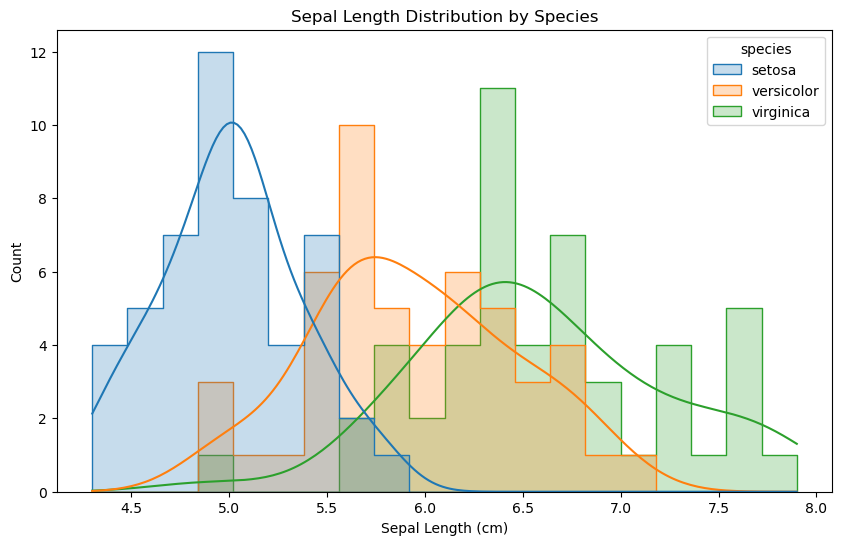

In [4]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Preview the dataset
iris.head()

# Plot histogram: Sepal Length distribution by Species
plt.figure(figsize=(10,6))
sns.histplot(
    data=iris,
    x='sepal_length',     # Numerical feature
    hue='species',         # Compare species
    kde=True,              # Smooth density curve
    element='step',        # Outline style for clarity
    multiple='layer',      # Overlapping layers
    bins=20                # Number of bins
)
plt.title("Sepal Length Distribution by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Count")
plt.show()


In [7]:
# iris = sns.load_dataset('iris') loads the dataset directly — no CSV needed.
# hue='species' splits the histogram by species (setosa, versicolor, virginica).
# element='step' ensures the histogram outlines don’t obscure each other.
# kde=True overlays smooth curves for each species distribution.
# multiple='layer' allows overlapping layers to compare distributions easily.